# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 7. Решающие деревья и случайные леса.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.




**Баллы за задание:**

* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 50 баллов
* Задача 3 &mdash; 30 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [31]:
# Bot check

# HW_ID: fpmi_ad7
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [173]:
import numpy as np
import pandas as pd
import scipy.stats
import warnings
import graphviz
from tqdm import tqdm_notebook

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.metrics import accuracy_score, mean_squared_error,
                            mean_absolute_error, mean_absolute_percentage_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor,
                         export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

sns.set(font_scale=1.5)
warnings.filterwarnings("ignore")

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/trees.html">ноутбук</a> с занятия по решающим деревьям.

---
### Задача 1.

Перед обучением линейной регрессии вы могли совершать некоторые преобразования над признаками. Какие преобразования стоит совершить перед обучением решающего дерева?

В частности, ответьте на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака;
* немонотонные функции от одного признака;
* линейные функции от нескольких признаков;
* нелинейные функции от нескольких признаков;
* стандартизация признаков;
* преобразования категориальных признаков.

Например, вместо/дополнительно признака $x_j$ рассматривать признак $f(x_j)$, для указанных выше типов функций.

**Ответ:**

**Монотонные функции от одного признака.** Они позволяют установить линейную зависимость между значением признака и таргетом. Однако, если это не так, то использование монотонных функций может привести к неправильным выводам и снижению качества модели.

**Немонотонные функции от одного признака.** Могут приводить к неправильным результатам, потому что может нарушится порядок разбиения по признакам.

**Линейные функции от нескольких признаков.** Кажется, что они могут хорошо себя показать, потому что при линейной зависимости данных размерность признаков после линейного преобразования будет уменьшаться.

**Нелинейные функции от нескольких признаков.** Деревья плохо восстанавливают линейные зависимости, поэтому иногда это может иметь смысл.

**Стандартизация признаков.** Стандартизация признаков не имеет смысла, т.к. в каждом узле идёт сравнение величин одного признака, порядки других признаков не оказывают влияния.

**Преобразования категориальных признаков.** Не всегда может иметь смысл, потому что само решающее дерево очень похоже на дерево выборов человека, и, сохраняя категориальность, можно упростить понимание и интерпретируемость дерева. 

Стоит добавить обработку выбросов, т.к. решающее дерево может сильно на них реагировать; удаление пропущенных значений.

---
### Задача 2.

Рассмотрим данные из <a href="https://miptstats.github.io/courses/ad_fivt/task6.html" target="_blank">предыдущего домашнего задания</a>. Скачайте данные и разделите их на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1.

In [253]:
df = pd.read_csv("day.csv")

Выполните необходимые преобразования признаков.

*Замечание.* Если в валидационной и/или тестовой частях есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

Не будем рассматривать следующие параметры: atemp, mnth, weekday и holiday, потому что скорее всего temp, season, workingday зависимы с ними соответственно линейно либо почти линейно. 

In [285]:
df = df[['season', 'workingday', 'weathersit', 'temp',
         'hum', 'windspeed', 'cnt']]
df.dropna(inplace=True)
train, valid_test = train_test_split(df, test_size=0.4)
valid, test = train_test_split(valid_test, test_size=0.5)

train.reset_index(drop=True, inplace=True)
valid.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

features = ['season', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed']
categorial_features = ['season', 'workingday', 'weathersit']
real_features = ['temp', 'hum', 'windspeed']
target_feature = 'cnt'

train.head()

,season,workingday,weathersit,temp,hum,windspeed,cnt
0,3,1,1,0.744167,0.634167,0.144283,4648
1,2,1,2,0.595652,0.716956,0.324474,3348
2,4,0,2,0.383333,0.709583,0.189679,5478
3,4,1,1,0.345000,0.524583,0.171025,5698
4,2,0,1,0.631667,0.504167,0.166667,7702


Визуализируем данные, чтобы было проще определить выбросы

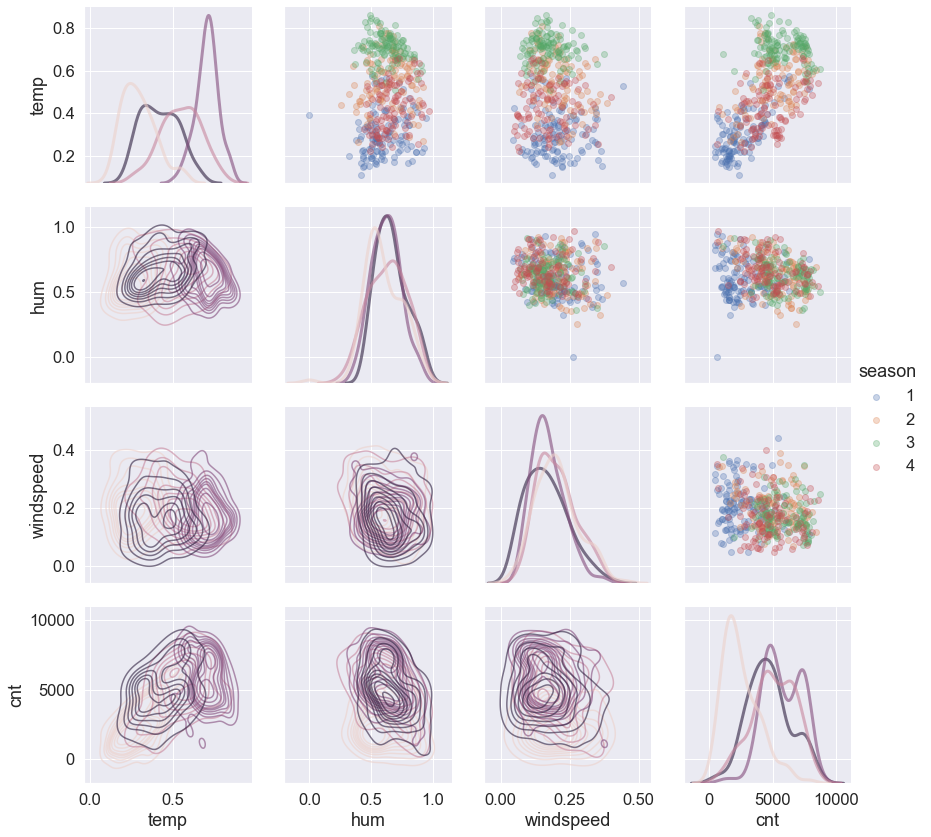

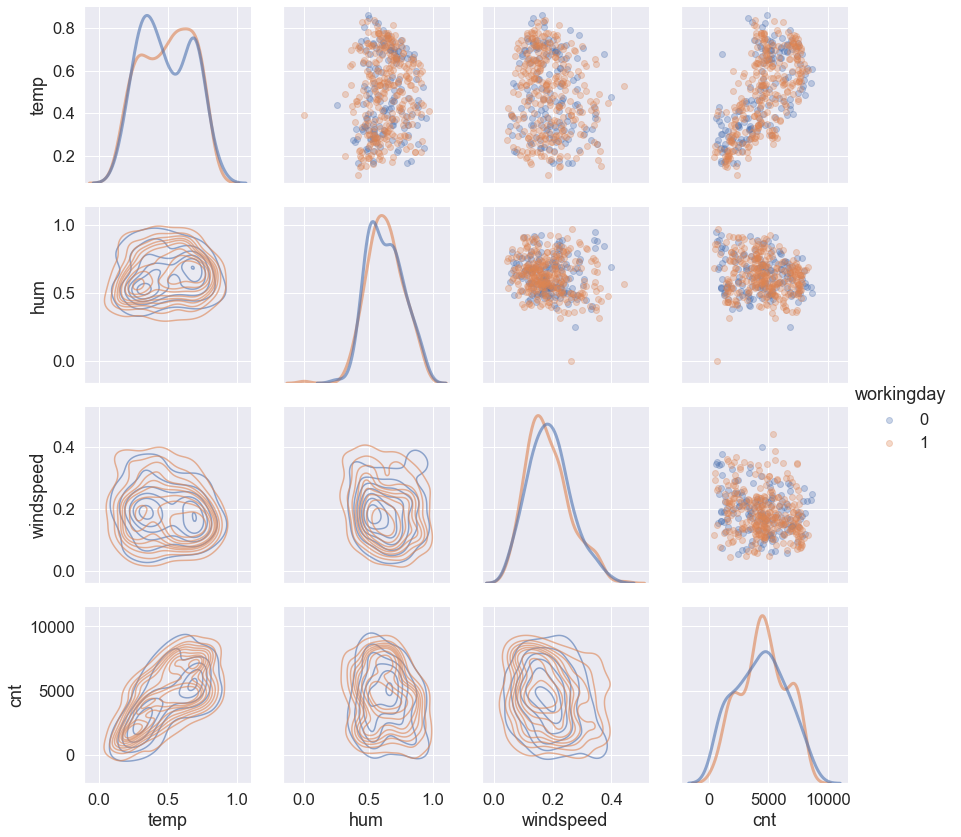

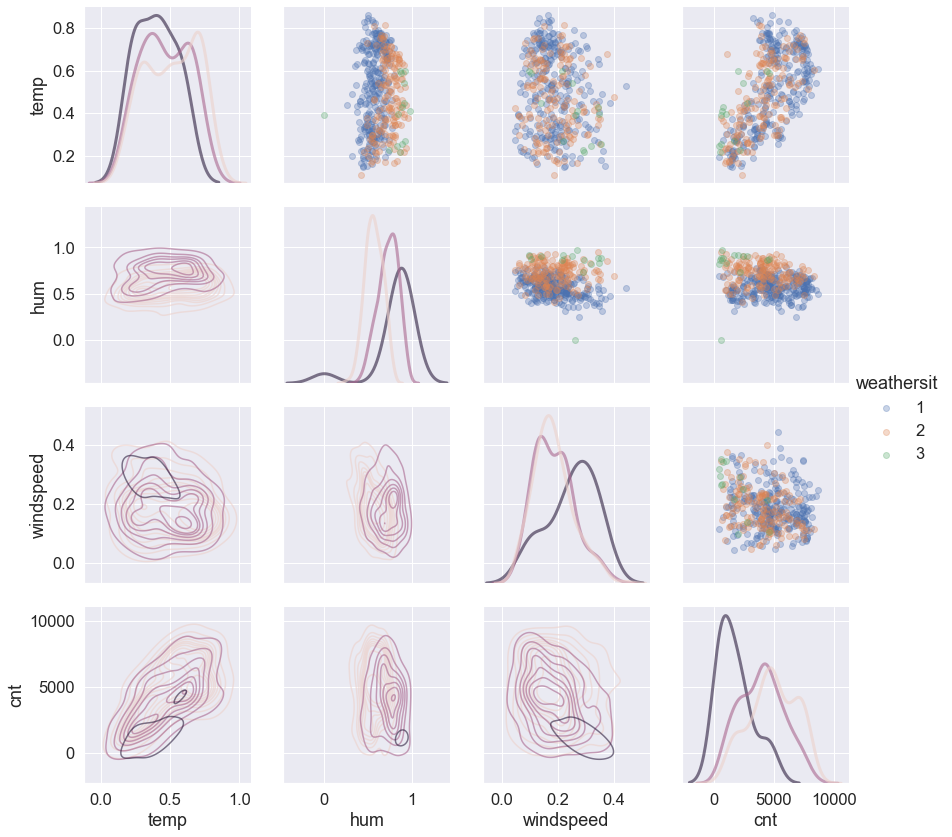

In [212]:
with sns.axes_style("darkgrid"):
    for hue in categorial_features:
        g = sns.PairGrid(train[['temp', 'hum', 'windspeed', 'cnt', hue]],
                         hue=hue, diag_sharey=False, height=3)

        g.map_lower(sns.kdeplot, alpha=0.6)
        g.map_upper(plt.scatter, alpha=0.3)
        g.map_diag(sns.kdeplot, lw=3, alpha=0.6,
                   common_norm=False)

        g.add_legend()

Избавимся от выбросов во всех частях, на которые мы разбили изначальный датасет

In [255]:
# Избавимся от выбросов
train = train[(train['hum'] > 0.4)]
train = train[(train['windspeed'] < 0.3)]
train = train[(train['temp'] > 0.1)]
train = train[(train['cnt'] > 800)]
train = train[(train['cnt'] < 9000)]
train = train[(train['hum'] < 0.9)]

# Уберём таргетированный параметр
X_train = train.drop(labels=['cnt'], axis=1)
Y_train = train['cnt']

# Избавимся от выбросов
test = test[(test['hum'] > 0.4)]
test = test[(test['windspeed'] < 0.3)]
test = test[(test['temp'] > 0.1)]
test = test[(test['cnt'] > 800)]
test = test[(test['cnt'] < 9000)]
test = test[(test['hum'] < 0.9)]

# Уберём таргетированный параметр
X_test = test.drop(labels=['cnt'], axis=1)
Y_test = test['cnt']

# Избавимся от выбросов
valid = valid[(valid['hum'] > 0.4)]
valid = valid[(valid['windspeed'] < 0.3)]
valid = valid[(valid['temp'] > 0.1)]
valid = valid[(valid['cnt'] > 800)]
valid = valid[(valid['cnt'] < 9000)]
valid = valid[(valid['hum'] < 0.9)]

# Уберём таргетированный параметр
X_valid = valid.drop(labels=['cnt'], axis=1)
Y_valid = valid['cnt']

In [271]:
X_test.shape, Y_test.shape

((121, 6), (121,))

Обучите решающее дерево глубины 3 и визуализируйте его. 

*Рекомендуется сохранить визуализацию в html и отправить ее вместе с решением.*

Напишем функцию визуализации дерева

In [257]:
def get_graphviz_graph(decision_tree_regressor):
    '''
    Функция для обучения решающего дерева и построения
    по нему графа graphviz для визуализации
    '''

    decision_tree_regressor.fit(X_train, Y_train)
    dot_data = export_graphviz( decision_tree_regressor, out_file=None,
        feature_names=X_train.columns, class_names='cnt', filled=True,
                               rounded=True, special_characters=True)  
    return graphviz.Source(dot_data) 

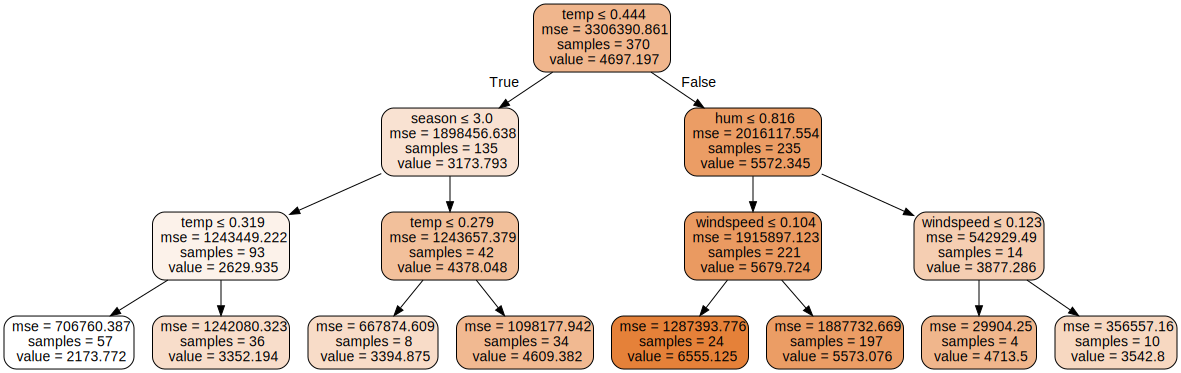

In [263]:
bike_regressor = DecisionTreeRegressor( criterion='mse', max_depth=3,
                                       min_samples_split=10)
graph = get_graphviz_graph(bike_regressor)
graph

Подберите оптимальное значение максимальной глубины дерева. Для этого обучите решающие деревья с выставленным значением соответствующего гиперпараметра и посчитайте ошибку предсказаний каждого из них на валидационной выборке. Постройте соответствующий график.

In [273]:
def metric_score(estimator, X_valid, Y_valid, metric=mean_squared_error):
    return metric(Y_valid, estimator.predict(X_valid))

metric_score(bike_regressor, X_valid, Y_valid)

1756496.6779867832

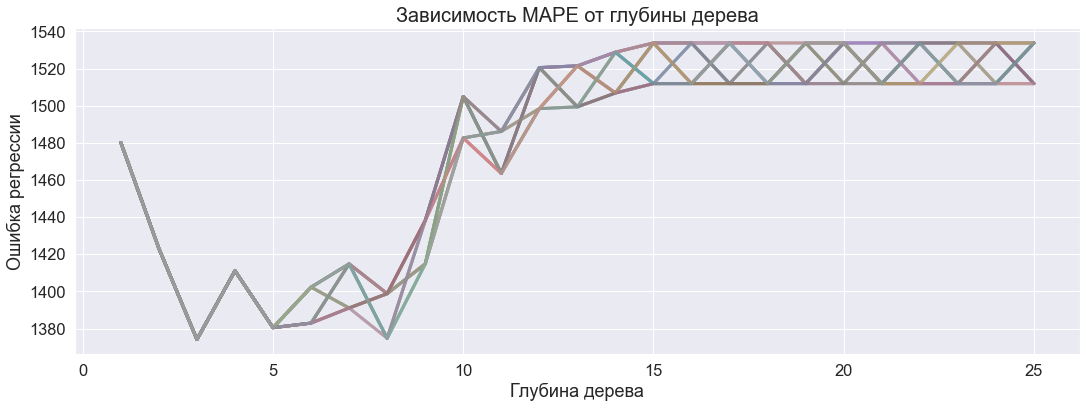

In [261]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(18, 6))

    for j in range(40):
        predictions = list()
        for i in range(25):
            bike_regressor = DecisionTreeRegressor(max_depth=i + 1,
                                                   min_samples_split=10)
            bike_regressor.fit(X_train, Y_train)
            predictions.append(metric_score(bike_regressor, X_valid,
                                            Y_valid) ** 0.5)
        plt.plot(np.linspace(1, 25, 25), predictions, label='valid', lw=3,
                 alpha=0.3)

    plt.xlabel('Глубина дерева')
    plt.ylabel('Ошибка регрессии')
    plt.title('Зависимость МАPЕ от глубины дерева', fontsize=20)

В ходе выполнения работы было замечено, что графики сильно зависят от разбиения данных на train, valid, test, при этом минимальные значения получаются в значениях от 2 до 8. Исходя из этого, зададим среднее значение глубины, равное пяти.

Аналогичным образом подберите минимальное число объектов в листе, зафиксировав при этом подобранное значение максимальной глубины.

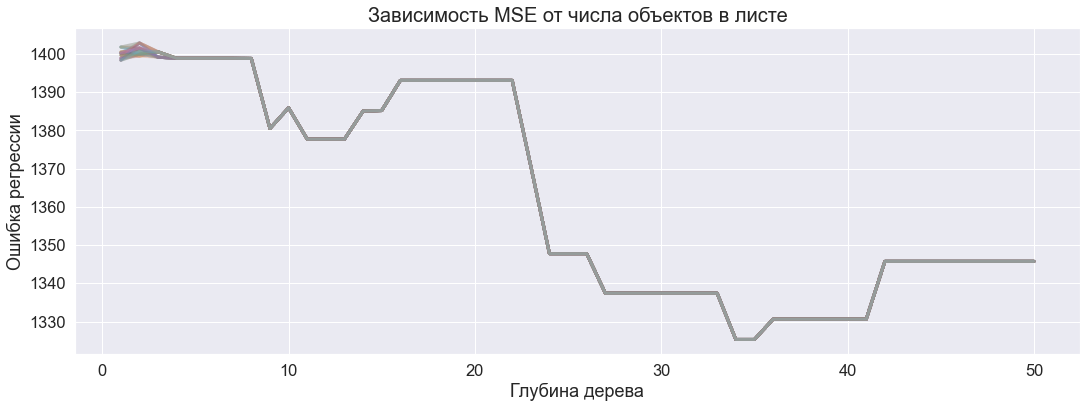

In [290]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(18, 6))

    for j in range(40):
        predictions = list()
        for i in range(50):
            bike_regressor = DecisionTreeRegressor(max_depth=5,
                                                   min_samples_split=i + 2)
            bike_regressor.fit(X_train, Y_train)
            predictions.append(metric_score(bike_regressor, X_valid,
                                            Y_valid) ** 0.5)
        plt.plot(np.linspace(1, 50, 50), predictions, label='valid', lw=3,
                 alpha=0.3)

    plt.xlabel('Глубина дерева')
    plt.ylabel('Ошибка регрессии')
    plt.title('Зависимость MSE от числа объектов в листе', fontsize=20)

Хорошо видно, как модель хорошо сходится после значения элементов в листьях, равным 10. Точность растёт вплоть до значений 34-35, после чего уже переобучается.

Полученные гиперпараметры модели:
   * **max_depth** = 5
   * **min_samples_split** = 35

Визуализируйте дерево при оптимальных гиперпараметрах и посчитайте его ошибку на тестовой части выборки.

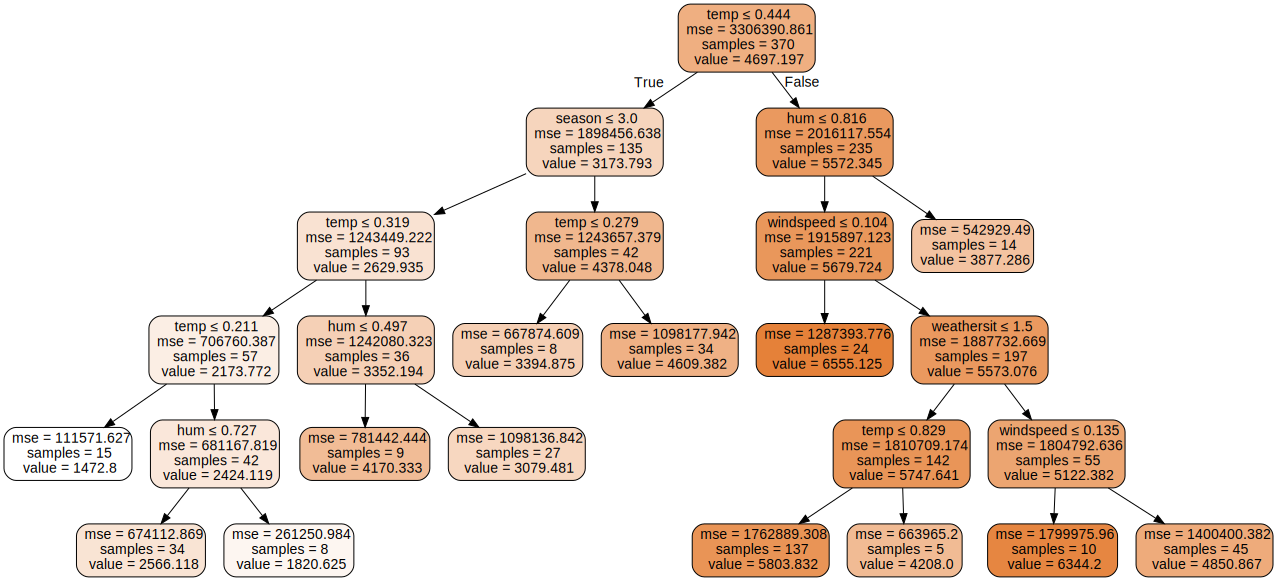

In [269]:
bike_regressor = DecisionTreeRegressor( criterion='mse', max_depth=5,
                                       min_samples_split=35)
graph = get_graphviz_graph(bike_regressor)
graph

Ошибка предсказания на тестовой части:

In [275]:
metric_score(bike_regressor, X_test, Y_test, metric=mean_squared_error) ** 0.5

1371.19100730983

Решающее дерево позволяет оценить *важность признаков* &mdash; некоторая величина, зависящая от того
* насколько часто тот или иной признак использовался при разбиении листа, 
* и насколько сильно при этом изменился критерий информативности.

У обученной модели значения важности признаков лежат в поле `feature_importances_`. Визуализируйте их с помощью `seaborn.barplot`.

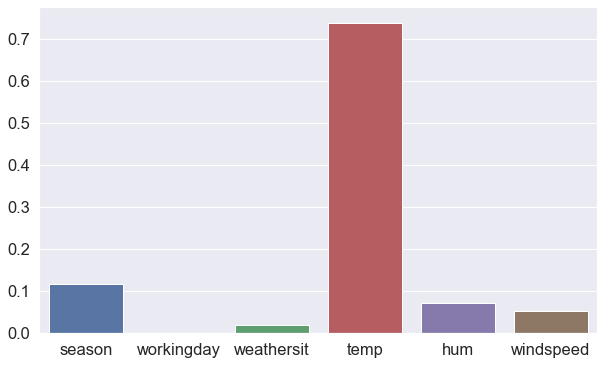

In [289]:
plt.figure(figsize=(10, 6))
sns.barplot(features, bike_regressor.feature_importances_);

Сделайте выводы.
   * Больше на результат влияет температура, важность которой вполне логична.
   * Остальные рассматриваемые признаки влиют на результат намного меньше, что немного неожиданно. Причём рабочий день вообще не влияет на результат. Немного выбивается из остальных признаков только сезон года.
   * Для обоих гиперпараметров модели существует порог, переходя через который модель переобучается, ошибка сильно возрастает и находится в пределах одного значения. Поэтому нет смысла увеличивать их значения до бесконечности.

---
### Задача 3.

Для данных из предыдущей части обучите случайный лес на 500 деревьев.

In [293]:
n_estimators = 500
model = RandomForestRegressor(n_estimators=n_estimators, max_depth=5,
                              min_samples_split=35)
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=5, min_samples_split=35, n_estimators=500)

Постройте график зависимости ошибки модели в зависимости от количества деревьев для обучающей и валидационной выборок.

*Замечание.* Не нужно заново обучать лес каждый раз. Используйте у *обученной* модели поле `estimators_`, это список из объектов класса `DecisionTreeRegressor`. Обратите внимание, что это приватное поле объекта, и менять его очень плохо, за такое баллы будут снижаться.

In [335]:
train_score = list()
valid_score = list()
model.predict(X_train)
model.predict(X_valid)

for i in range(500):
    train_predict = np.mean([tree.predict(X_train) for tree in
                             model.estimators_[:i + 1]], axis=0)
    valid_predict = np.mean([tree.predict(X_valid) for tree in
                             model.estimators_[:i + 1]], axis=0)

    train_score.append(mean_squared_error(Y_train, train_predict))
    valid_score.append(mean_squared_error(Y_valid, valid_predict))

Text(0.5, 1.0, 'fgfdgsfhg')

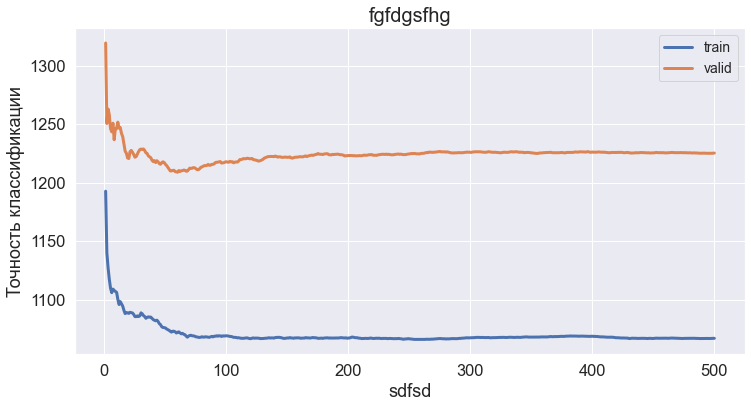

In [336]:
train_score = np.array(train_score) ** 0.5
valid_score = np.array(valid_score) ** 0.5

# Визуализируем данные
plt.figure(figsize=(12, 6))

plt.plot(np.linspace(1, 500, 500), train_score, label='train', lw=3)
plt.plot(np.linspace(1, 500, 500), valid_score, label='valid', lw=3)
plt.legend(fontsize=14)
plt.xlabel("Зависимость ошибки от количества деревьев")
plt.ylabel('Размер ошибки')
plt.title("Количество деревьев", fontsize=20)

Посмотрим на график в пределах первых 100 деревьев

Text(0.5, 1.0, 'Количество деревьев')

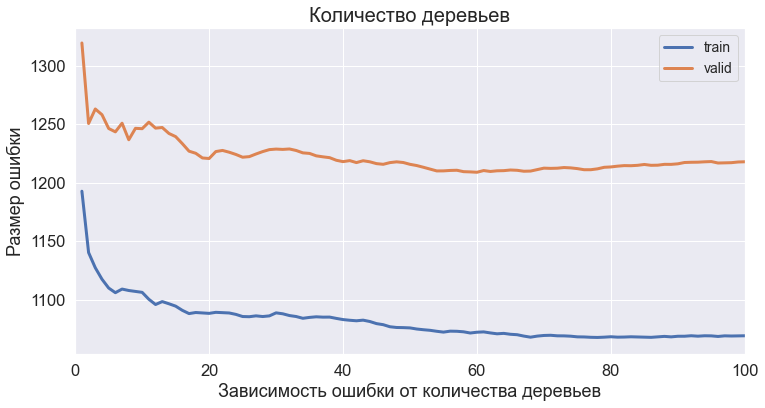

In [339]:
plt.figure(figsize=(12, 6))

plt.plot(np.linspace(1, 500, 500), train_score, label='train', lw=3)
plt.plot(np.linspace(1, 500, 500), valid_score, label='valid', lw=3)
plt.legend(fontsize=14)
plt.xlim(0, 100)
plt.xlabel("Зависимость ошибки от количества деревьев")
plt.ylabel('Размер ошибки')
plt.title("Количество деревьев", fontsize=20)

Для леса с максимальным количеством деревьев визуализируйте
важность признаков, используя поле `feature_importances_`. 

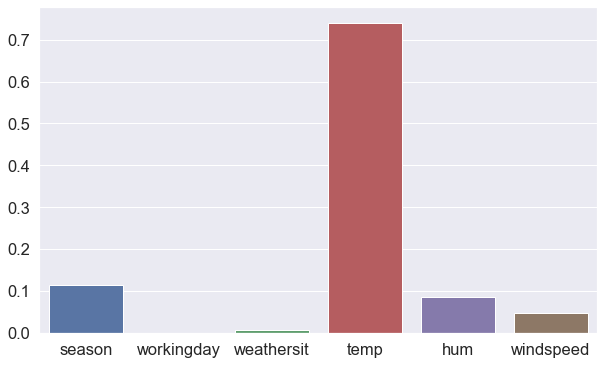

In [337]:
plt.figure(figsize=(10, 6))
sns.barplot(features, model.feature_importances_);

Сделайте выводы.
   * Уже при нескольких десятках деревьев точность быстро приближается к предельной, достигаемой при количестве деревьев больше 100.
   * На тренировочных данных при увеличении количества деревьев точность только растёт, на валидационных же после 60 деревьев точность немного падает и выходит на плато. В целом, можно сказать, что увеличение количества деревьев даёт преимущество в предсказании.
   * Пропорциональное соотношение важности признаков осталось таким же, каким было. 
   * Количество деревьев в лесу в пределах 200-300 уже достаточно, чтобы получить предельный для такой модели результат, т.е. в 2 раза меньше, чем задавалось изначально.